In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
medi_df=pd.read_csv("insurance.csv")

In [14]:
medi_df_copy=medi_df.copy()

In [15]:
medi_df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
medi_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
# encode male-> 1 , female-> 0
medi_df_copy["sex"]=np.where(medi_df_copy["sex"]=="male",1,0)

In [18]:
medi_df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [19]:
medi_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [20]:
medi_df_copy["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [21]:
# encode smoker
medi_df_copy["smoker"]=np.where(medi_df_copy["smoker"]=="yes",1,0)

In [22]:
medi_df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [23]:
medi_df_copy["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [24]:
medi_df_copy.to_csv("insurance_cleaned.csv")

# EDA

<Figure size 1000x1000 with 0 Axes>

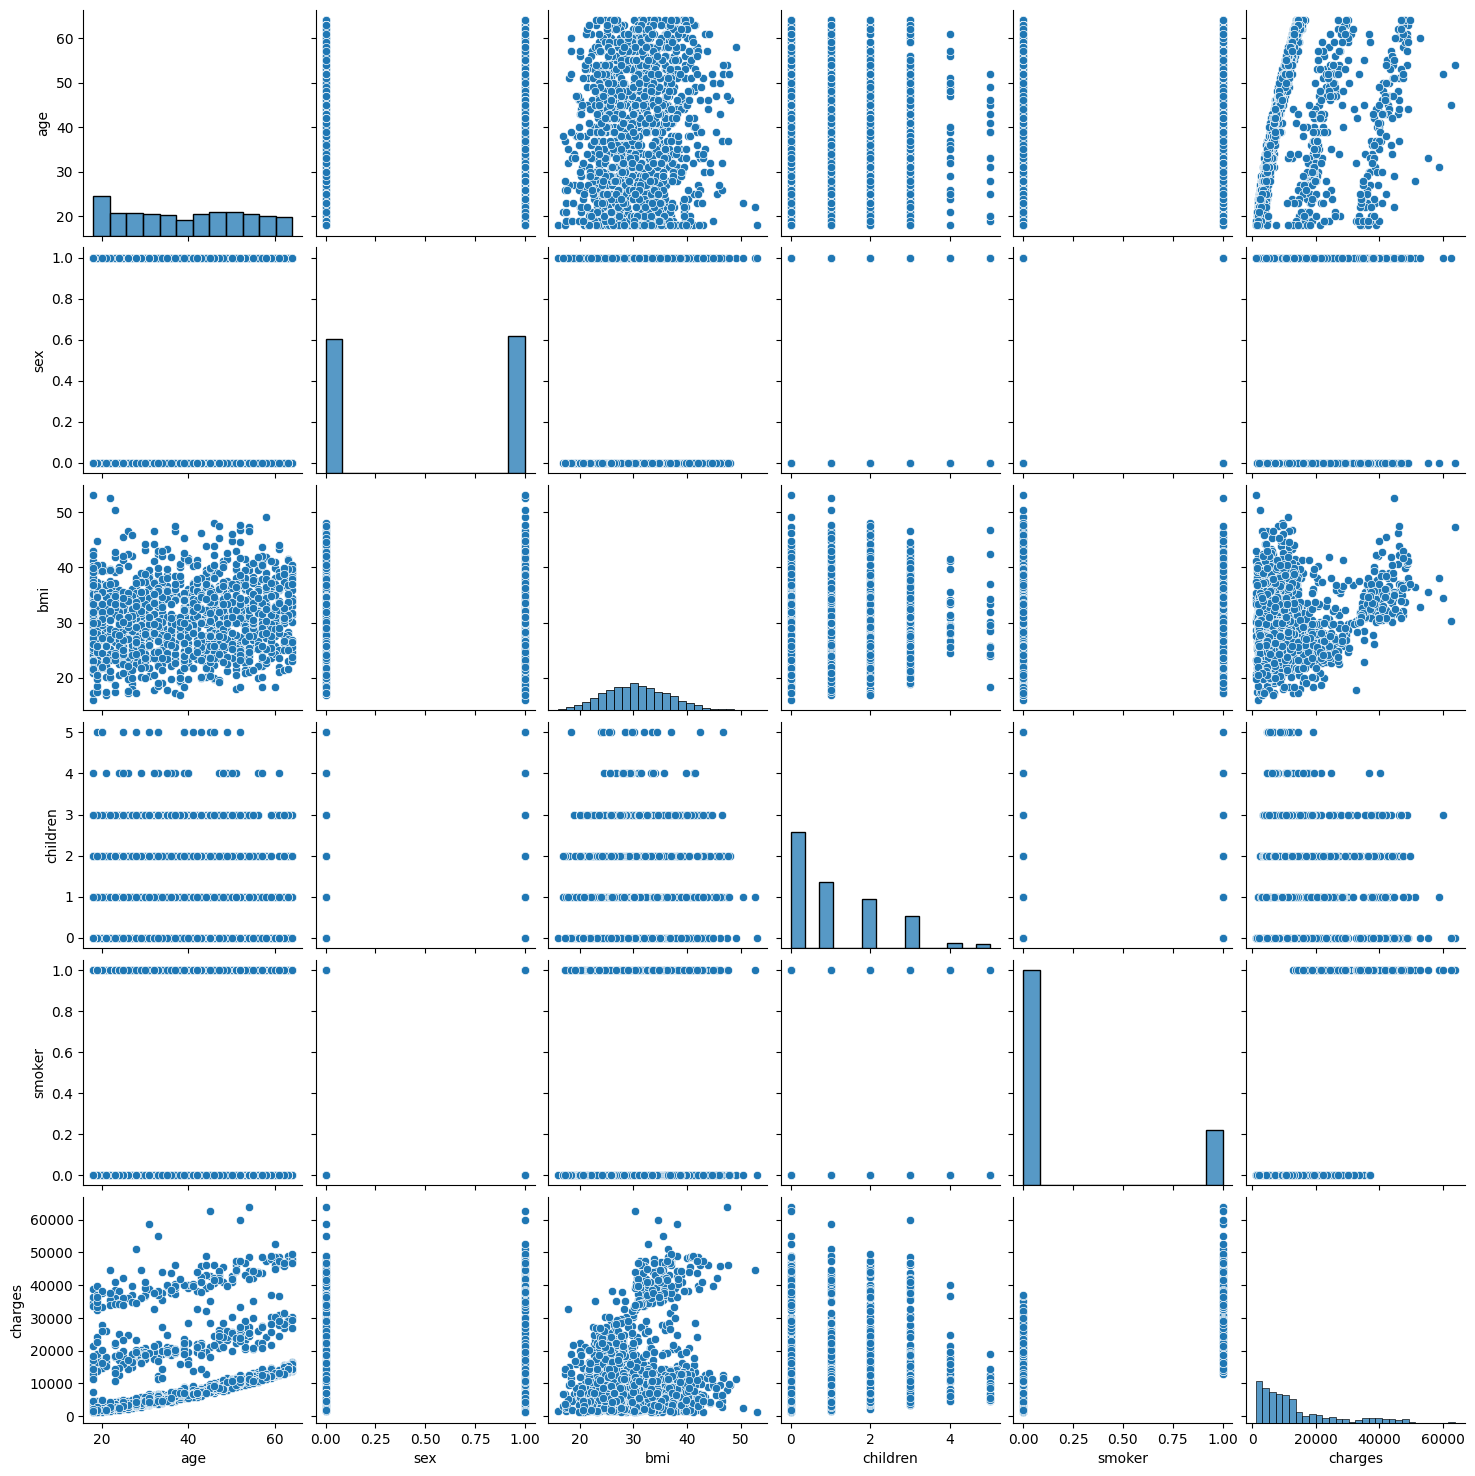

In [25]:
plt.figure(figsize=(10,10))
sns.pairplot(medi_df_copy)
plt.show()

In [27]:
medi_df_copy.drop(labels='region',axis=1,inplace=True)

In [29]:
corr_vals=medi_df_copy.corr()
corr_vals

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


In [30]:
# independent and dependent sets
X=medi_df_copy.iloc[:,:-1]
y=medi_df_copy.iloc[:,-1]

In [31]:
X.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [32]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [33]:
# train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [34]:
X_train.shape,X_test.shape

((1003, 5), (335, 5))

In [35]:
# standardization 
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [67]:
# add polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
poly_transform=PolynomialFeatures(degree=2,include_bias=True)

In [68]:
# model selection through ridge, lasso and training

#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

lin_reg=LinearRegression(n_jobs=-1)

poly_lin_reg=Pipeline([
    ('poly_transform',poly_transform),
    ('lin_reg',lin_reg)
])

poly_lin_reg.fit(X_train_scaled,y_train)
y_pred=poly_lin_reg.predict(X_test_scaled)

mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
r2_val=r2_score(y_true=y_test,y_pred=y_pred)

print(mse)
print(mae)
print(r2_val)

22017600.48633745
2825.2481578854185
0.8540828803503868


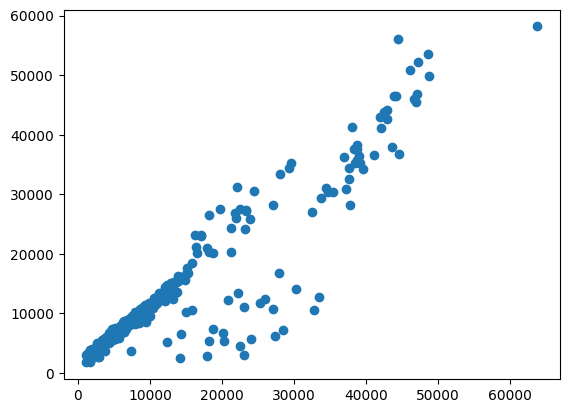

In [69]:
plt.scatter(y_test,y_pred)
plt.show()

In [74]:
# LassoCV

from sklearn.linear_model import LassoCV

lasso_reg=LassoCV(cv=5,random_state=42)

poly_lasso_reg=Pipeline([
    ('poly_transform',poly_transform),
    ('lasso_reg',lasso_reg)
])
poly_lasso_reg.fit(X_train_scaled,y_train)
y_pred=poly_lasso_reg.predict(X_test_scaled)

mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
r2_val=r2_score(y_true=y_test,y_pred=y_pred)

print(mse)
print(mae)
print(r2_val)

21903564.372583725
2841.2515703571926
0.8548386312445546


In [71]:
lasso_reg.alpha_

np.float64(137.38521677585737)

In [72]:
lasso_reg.coef_

array([ 0.00000000e+00,  3.59019324e+03, -6.16979842e+01,  1.78131003e+03,
        5.96122912e+02,  0.00000000e+00,  5.45076298e+02,  0.00000000e+00,
        3.50856330e+01, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        7.42644600e+00, -4.22094011e+00,  0.00000000e+00, -2.30038108e+02,
        0.00000000e+00,  3.41416157e+03,  0.00000000e+00, -5.99974884e+01,
        6.49142935e+03])

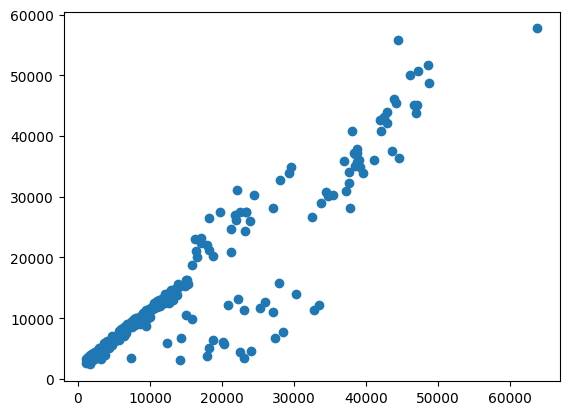

In [73]:
plt.scatter(y_test,y_pred)
plt.show()

In [75]:
# Ridge CV
from sklearn.linear_model import RidgeCV
ridge_reg=RidgeCV(cv=5)

poly_ridge_reg=Pipeline([
    ('poly_transform',poly_transform),
    ('ridge_reg',ridge_reg)
])

poly_ridge_reg.fit(X_train_scaled,y_train)
y_pred=poly_ridge_reg.predict(X_test_scaled)

mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
r2_val=r2_score(y_true=y_test,y_pred=y_pred)

print(mse)
print(mae)
print(r2_val)


21991406.16839325
2836.0636179643698
0.8542564778061121


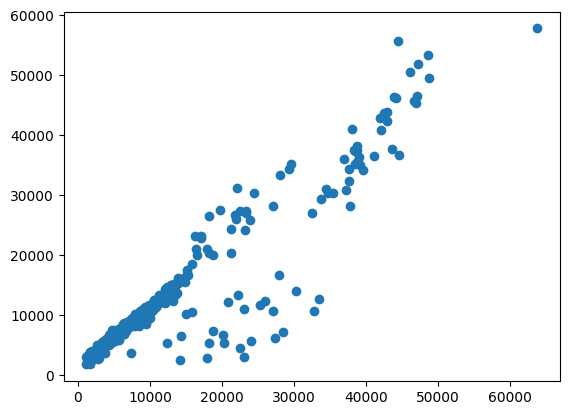

In [76]:
plt.scatter(y_test,y_pred)
plt.show()

In [77]:
ridge_reg.alpha_

np.float64(10.0)

In [80]:
# ElasticNet CV

from sklearn.linear_model import ElasticNetCV

elastic_reg=ElasticNetCV(cv=5,random_state=42,l1_ratio=0.9)

poly_elastic_reg=Pipeline([
    ('poly_transform',poly_transform),
    ('elastic_reg',elastic_reg)
])

poly_elastic_reg.fit(X_train_scaled,y_train)
y_pred=poly_elastic_reg.predict(X_test_scaled)

mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
r2_val=r2_score(y_true=y_test,y_pred=y_pred)

print(mse)
print(mae)
print(r2_val)

43451603.5271005
4942.658459374521
0.712033432763673


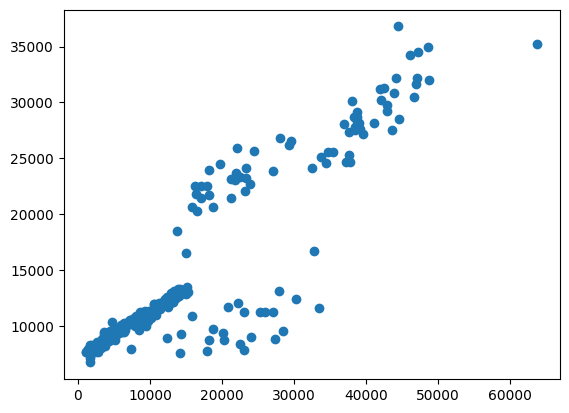

In [81]:
plt.scatter(y_test,y_pred)
plt.show()